# Rice Crops Diseases Detection Using DenseNet Model

## Import Libraries

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Constants

In [7]:
IMAGE_SIZE = (128, 128)  
BATCH_SIZE = 32 
NUM_CLASSES = 9  

# Data Preparation

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255)

# Create a training data generator

In [9]:
train_generator = train_datagen.flow_from_directory(
    'Dataset',  
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 12647 images belonging to 9 classes.


# Create DenseNet121 Model

In [10]:
def create_densenet_model(num_classes):
    base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    for layer in base_model.layers:
        layer.trainable = False

    return model

# Compile Model

In [6]:
densenet_model = create_densenet_model(NUM_CLASSES)
densenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


# Train the Model


In [8]:
history = densenet_model.fit(
    train_generator,
    epochs=20  
)

Epoch 1/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 233s 587ms/step - accuracy: 0.7339 - loss: 0.7995
Epoch 2/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 392s 989ms/step - accuracy: 0.8730 - loss: 0.4106
Epoch 3/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 338s 848ms/step - accuracy: 0.9088 - loss: 0.3100
Epoch 4/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 278s 698ms/step - accuracy: 0.9230 - loss: 0.2575
Epoch 5/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 263s 661ms/step - accuracy: 0.9302 - loss: 0.2361
Epoch 6/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 257s 645ms/step - accuracy: 0.9407 - loss: 0.2121
Epoch 7/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 257s 644ms/step - accuracy: 0.9498 - loss: 0.1832
Epoch 8/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 258s 648ms/step - accuracy: 0.9494 - loss: 0.1811
Epoch 9/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 256s 644ms/step - accuracy: 0.9592 - loss: 0.1568
Epoch 10/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 261s 657ms/step - accuracy: 0.9594 - loss: 0.1493
Epoch 11/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 261s 655ms/step - accuracy: 0.9606 - loss: 0.1456
Epoch 12

# Save the Model

In [9]:
densenet_model.save('densenet_model.keras')

In [10]:
np.save('Densenet_training_history.npy', history.history)

# Evaluate Model to Get Accuracy

In [13]:
train_generator.reset()  
test_loss, test_accuracy = densenet_model.evaluate(train_generator, verbose=1)
print(f"Test Loss: {test_loss*100:.2f}%")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

396/396 ━━━━━━━━━━━━━━━━━━━━ 392s 981ms/step - accuracy: 0.9826 - loss: 0.0822
Test Loss: 8.06%
Test Accuracy: 98.37%


# Load the Model

In [3]:
from tensorflow.keras.models import load_model

model = load_model('densenet_model.keras')

# Load Test Data

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_data_dir = 'Dataset'

test_datagen = ImageDataGenerator(rescale=1.0/255) 

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(128, 128),  
    batch_size=32,                    
    class_mode='categorical',                 
    shuffle=False
)

X_test, y_test = next(test_generator)

Found 12647 images belonging to 9 classes.


# Create confusion matrix

396/396 ━━━━━━━━━━━━━━━━━━━━ 391s 988ms/step


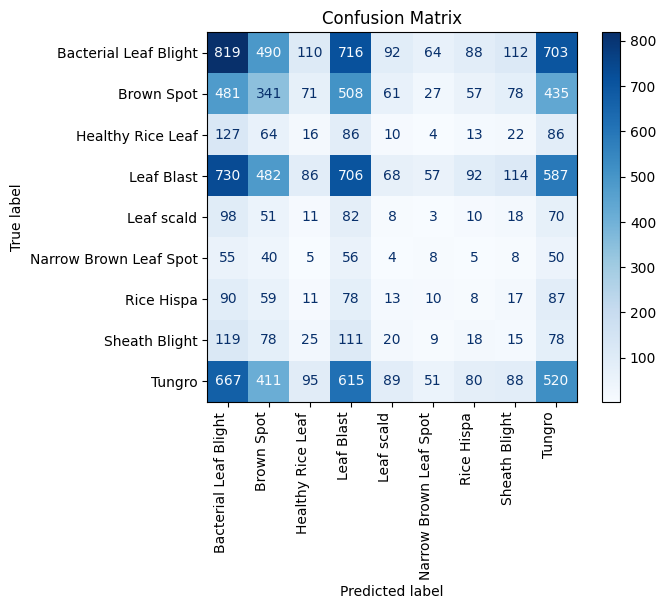

In [12]:
predictions = model.predict(train_generator)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = train_generator.classes
class_labels = list(train_generator.class_indices.keys())

cm = confusion_matrix(true_classes, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xticks(rotation=90, ha='right')
plt.show()

# Plotting Model Accuracy and Loss:

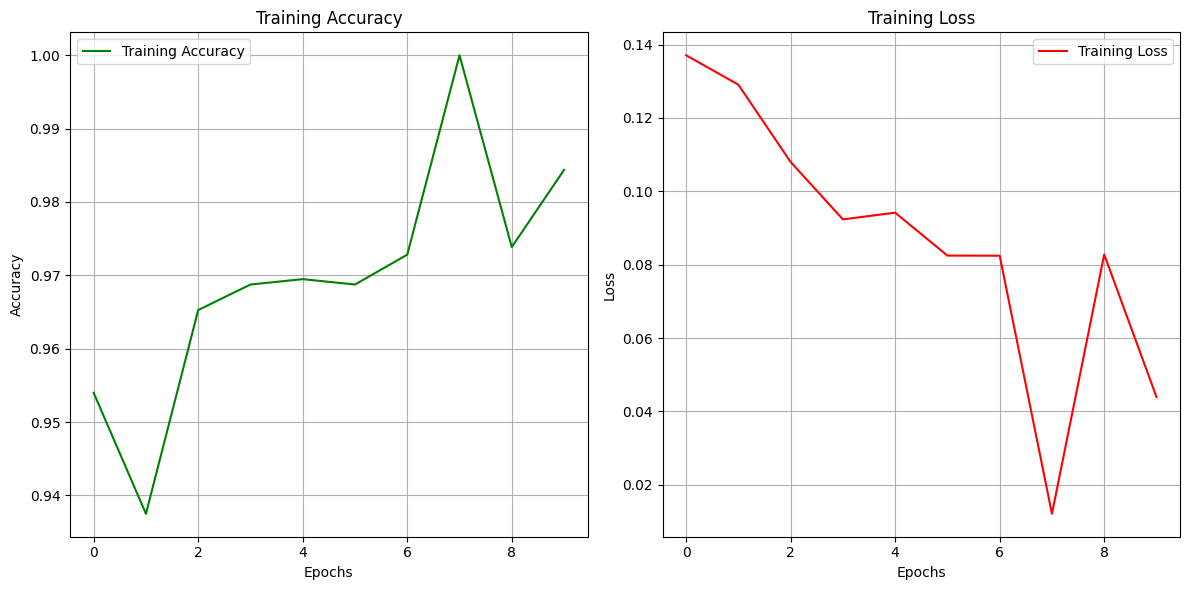

In [19]:
history_data = np.load('Densenet_training_history.npy', allow_pickle=True).item()


class History:
    def __init__(self, history_data):
        self.history = history_data

history = History(history_data)


def plot_additional_graphs(history):
    plt.figure(figsize=(12, 6))
   
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='green')
    plt.title('Training Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
  
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss', color='red')
    plt.title('Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

plot_additional_graphs(history)


# Evaluate Accuracy and Loss on Test Data

396/396 ━━━━━━━━━━━━━━━━━━━━ 328s 828ms/step - accuracy: 0.9824 - loss: 0.0853
Accuracy after fine-tuning: 98.37%


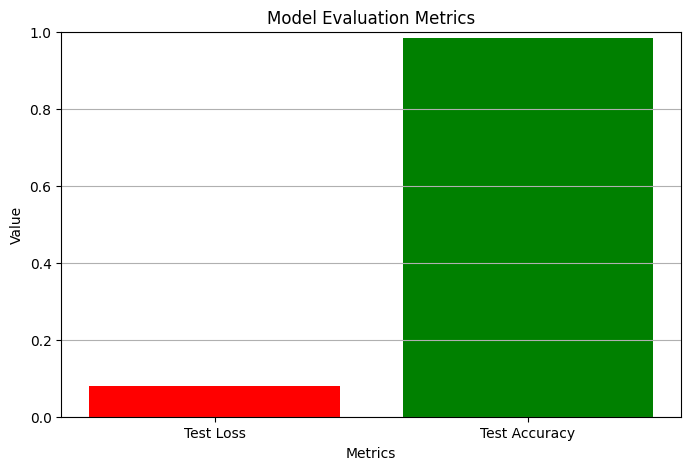

In [18]:
test_loss, test_accuracy = model.evaluate(train_generator)
print(f"Accuracy after fine-tuning: {test_accuracy*100:.2f}%")
import matplotlib.pyplot as plt

metrics = ['Test Loss', 'Test Accuracy']
values = [test_loss, test_accuracy]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['red', 'green'])
plt.ylim(0, 1)  
plt.title('Model Evaluation Metrics')
plt.ylabel('Value')
plt.xlabel('Metrics')
plt.grid(axis='y')

plt.show()

# Model Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


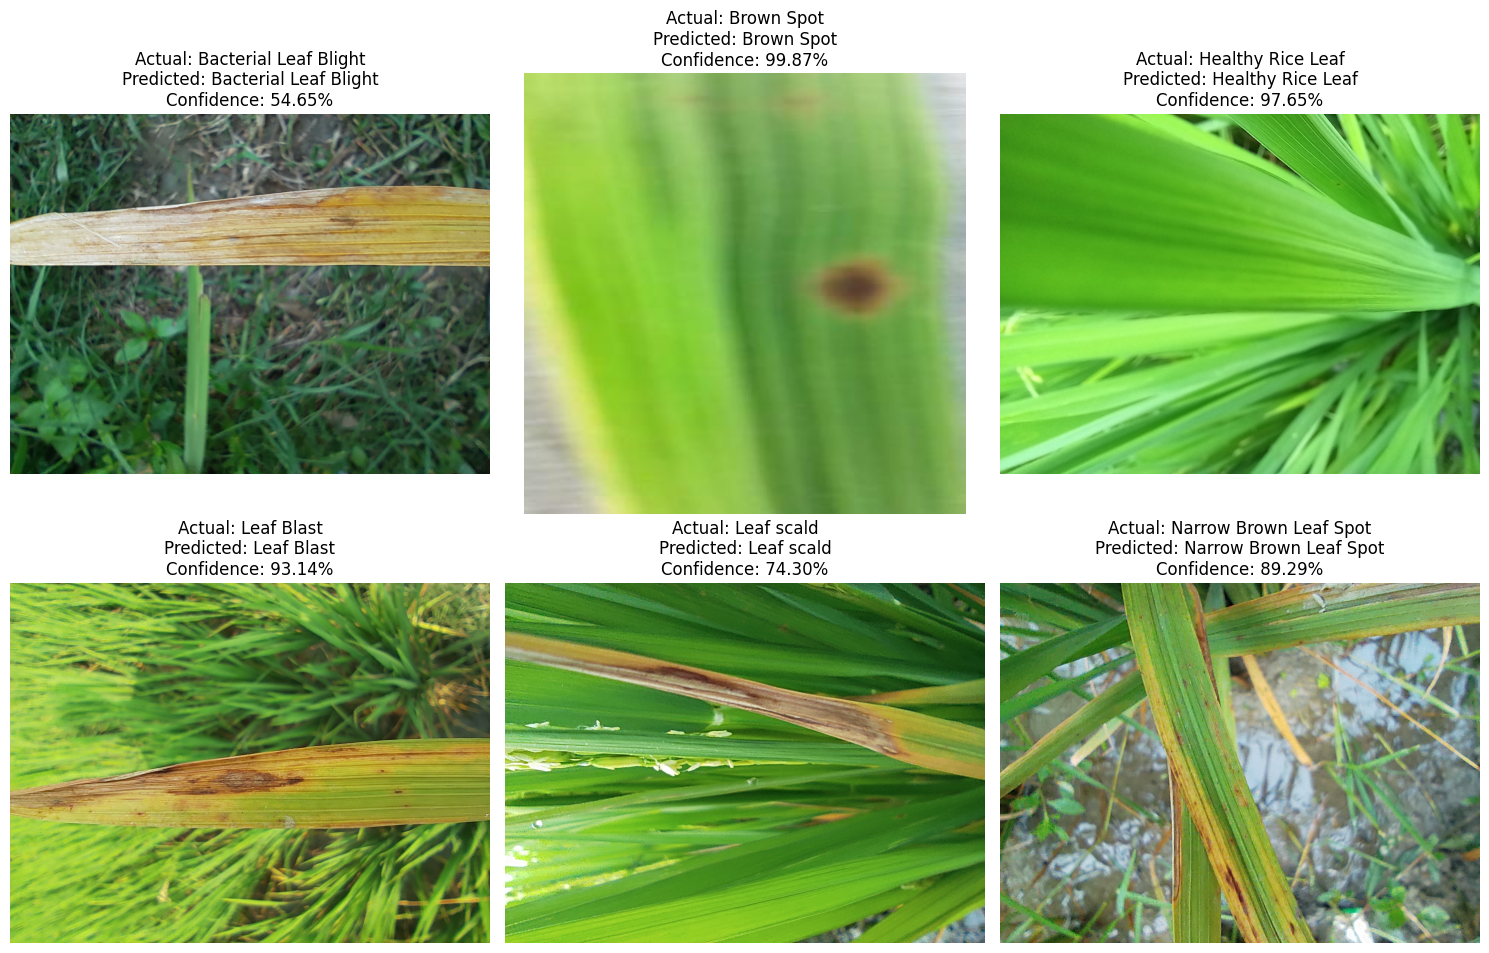

In [2]:
import tensorflow as tf
import numpy as np
import os
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array, load_img

model = tf.keras.models.load_model('densenet_model.keras')

dataset_path = 'Dataset'

class_names = sorted(os.listdir(dataset_path))  

def prepare_image(image_path):
    """Preprocesses the image for model prediction."""
    img = load_img(image_path, target_size=(128, 128)) 
    img_array = img_to_array(img) / 255.0  
    img_array = np.expand_dims(img_array, axis=0)  
    return img_array

def predict_image(image_path):
    """Predicts the class and confidence of an image."""
    img_array = prepare_image(image_path)
    predictions = model.predict(img_array)
    predicted_class_idx = np.argmax(predictions, axis=1)[0]
    predicted_class = class_names[predicted_class_idx]
    confidence = np.max(predictions)
    return predicted_class, confidence

sample_images = []
for class_dir in class_names:
    class_dir_path = os.path.join(dataset_path, class_dir)
    images_in_class = os.listdir(class_dir_path)
    random_image = random.choice(images_in_class)  
    sample_images.append(os.path.join(class_dir_path, random_image))

plt.figure(figsize=(15, 10))
for i, image_path in enumerate(sample_images[:6]):  
    actual_class = os.path.basename(os.path.dirname(image_path))
    predicted_class, confidence = predict_image(image_path)

    plt.subplot(2, 3, i + 1) 
    img = load_img(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence:.2%}")

plt.tight_layout()

plt.savefig("densenet_predictions_grid.png", format="png", dpi=300)  # Save with high resolution
plt.show()
